In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
cd /kaggle/input/retntion-potential

/kaggle/input/retntion-potential


In [4]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 KB 5.1 MB/s eta 0:00:0000:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
Customer_Train = pd.read_excel("Customerdata_Train.xlsx")
Emaildata_Train = pd.read_excel("Emaildata_Train.xlsx")
Transactiondata_data = pd.read_excel("transactionsdata_Train.xlsx")
Train = pd.read_excel("Train.xlsx")

In [14]:
Customer_Train.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday


In [15]:
Emaildata_Train.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [16]:
Transactiondata_data.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


In [17]:
Train.head()

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High


In [18]:
print("Customer_Train        ------------------>   ",Customer_Train.shape)
print("Emaildata_Train       ------------------>   ",Emaildata_Train.shape)
print("Transactiondata_data  ------------------>   ",Transactiondata_data.shape)
print("Train                 ------------------>   ",Train.shape)

Customer_Train        ------------------>    (23820, 7)
Emaildata_Train       ------------------>    (517672, 6)
Transactiondata_data  ------------------>    (104755, 4)
Train                 ------------------>    (23820, 2)


In [19]:
print("*****unique values of Customer_Train*****")
print(Customer_Train.nunique())
print("---------------------------------------")

print("*****unique values of Emaildata_Train*****")
print(Emaildata_Train.nunique())
print("---------------------------------------")

print("*****unique values of Transactiondata_data*****")
print(Transactiondata_data.nunique())
print("---------------------------------------")

print("*****unique values of Train*****")
print(Train.nunique())
print("---------------------------------------")

*****unique values of Customer_Train*****
CustomerID              23820
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
dtype: int64
---------------------------------------
*****unique values of Emaildata_Train*****
CustomerID     23820
DateOfemail     3382
EmailType          2
timestamp      14369
MailOpened         2
MailClicked        3
dtype: int64
---------------------------------------
*****unique values of Transactiondata_data*****
CustomerID       23820
DateOfOrder       3151
timestamp        21399
OrderQuantity      451
dtype: int64
---------------------------------------
*****unique values of Train*****
CustomerID            23820
RetentionPotential        3
dtype: int64
---------------------------------------


In [20]:
print("*****unique values of Customer_Train*****")
print(Customer_Train.duplicated().sum())
print("---------------------------------------")

print("*****unique values of Emaildata_Train*****")
print(Emaildata_Train.duplicated().sum())
print("---------------------------------------")

print("*****unique values of Transactiondata_data*****")
print(Transactiondata_data.duplicated().sum())
print("---------------------------------------")

print("*****unique values of Train*****")
print(Train.duplicated().sum())
print("---------------------------------------")

*****unique values of Customer_Train*****
0
---------------------------------------
*****unique values of Emaildata_Train*****
0
---------------------------------------
*****unique values of Transactiondata_data*****
0
---------------------------------------
*****unique values of Train*****
0
---------------------------------------


In [21]:
Emaildata_Train = Emaildata_Train.groupby(['CustomerID']).max()
Emaildata_Train

,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
CustomerID,,,,,
C12116,2013-10-09,WelcomeEmail,17:56:42,yes,yes
C12117,2013-12-05,WelcomeEmail,15:59:30,yes,NotApplicable
C12118,2013-09-10,WelcomeEmail,14:49:14,yes,NotApplicable
C12119,2013-10-21,WelcomeEmail,17:52:28,yes,yes
C12120,2014-01-10,WelcomeEmail,11:40:10,yes,NotApplicable
...,...,...,...,...,...
C42185,2011-12-30,WelcomeEmail,17:54:52,yes,no
C42186,2013-11-23,WelcomeEmail,17:28:20,yes,NotApplicable
C42187,2013-09-15,WelcomeEmail,15:15:34,yes,NotApplicable


In [22]:
Transactiondata_data = Transactiondata_data.groupby(['CustomerID']).max()
Transactiondata_data

,DateOfOrder,timestamp,OrderQuantity
CustomerID,,,
C12116,2013-10-10,19:50:02,44
C12117,2013-12-05,18:47:14,41
C12118,2013-09-10,10:08:42,41
C12119,2013-10-22,20:48:00,52
C12120,2014-01-10,13:24:12,31
...,...,...,...
C42185,2012-01-03,21:12:16,113
C42186,2013-11-23,15:11:32,46
C42187,2013-09-15,10:17:54,41


In [23]:
df1 = pd.merge(Customer_Train,Emaildata_Train,on="CustomerID")
df2 = pd.merge(df1,Transactiondata_data,on="CustomerID")
merged_train = pd.merge(df2,Train,on="CustomerID")

In [24]:
merged_train

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,timestamp_x,MailOpened,MailClicked,DateOfOrder,timestamp_y,OrderQuantity,RetentionPotential
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-07-25,WelcomeEmail,17:31:54,yes,yes,2013-08-11,15:17:52,15,High
1,C20345,CITY2,2010-12-19,1,1,1,Friday,2013-12-19,WelcomeEmail,17:45:30,yes,yes,2014-01-19,21:54:56,108,Low
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable,2011-07-06,21:24:28,51,Medium
3,C18647,CITY4,2010-11-27,0,0,0,Monday,2012-12-17,WelcomeEmail,17:51:12,yes,yes,2013-01-28,19:50:26,117,Low
4,C36692,CITY2,2009-12-04,1,1,0,Friday,2014-01-16,WelcomeEmail,17:58:10,yes,yes,2014-01-16,21:53:58,83,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,2018-01-17,1,1,0,Friday,2018-01-17,WelcomeEmail,14:09:30,yes,NotApplicable,2018-01-17,10:37:10,41,Low
23816,C12197,CITY3,2018-01-17,1,0,1,Friday,2018-01-17,WelcomeEmail,15:45:26,yes,NotApplicable,2018-01-17,14:35:40,56,Low
23817,C40967,CITY3,2018-01-17,1,0,0,Saturday,2018-01-17,WelcomeEmail,15:17:08,yes,NotApplicable,2018-01-17,17:15:20,35,Low
23818,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,WelcomeEmail,16:31:18,yes,yes,2018-01-21,21:12:52,53,Low


In [25]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            23820 non-null  object        
 1   City                  23820 non-null  object        
 2   DateOfRegistration    23820 non-null  datetime64[ns]
 3   OnlineCommunication   23820 non-null  int64         
 4   AutomaticRefill       23820 non-null  int64         
 5   DoorstepDelivery      23820 non-null  int64         
 6   PreferredDeliveryDay  23820 non-null  object        
 7   DateOfemail           23820 non-null  object        
 8   EmailType             23820 non-null  object        
 9   timestamp_x           23820 non-null  object        
 10  MailOpened            23820 non-null  object        
 11  MailClicked           23820 non-null  object        
 12  DateOfOrder           23820 non-null  object        
 13  timestamp_y     

In [26]:
merged_train.duplicated().sum()

0

In [27]:
merged_train = merged_train.astype({"CustomerID":"category","City":"category","OnlineCommunication":"category","AutomaticRefill":"category","DoorstepDelivery":"category","PreferredDeliveryDay":"category","DateOfemail":"category","EmailType":"category","timestamp_x":"category","MailOpened":"category","MailClicked":"category","DateOfOrder":"category","timestamp_y":"category","RetentionPotential":"category"})
merged_train.dtypes

CustomerID                    category
City                          category
DateOfRegistration      datetime64[ns]
OnlineCommunication           category
AutomaticRefill               category
DoorstepDelivery              category
PreferredDeliveryDay          category
DateOfemail                   category
EmailType                     category
timestamp_x                   category
MailOpened                    category
MailClicked                   category
DateOfOrder                   category
timestamp_y                   category
OrderQuantity                    int64
RetentionPotential            category
dtype: object

In [28]:
merged_train.describe()

,DateOfRegistration,OrderQuantity
count,23820,23820.000000
mean,2013-10-18 05:58:00.302267136,65.653778
min,2008-06-17 00:00:00,0.000000
25%,2012-10-16 00:00:00,41.000000
50%,2013-09-23 00:00:00,53.000000
75%,2013-12-16 00:00:00,80.000000
max,2018-01-17 00:00:00,1501.000000
std,NaN,41.270385


In [29]:
removing_rows = merged_train[merged_train['OrderQuantity'] < 1]
removing_rows

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,timestamp_x,MailOpened,MailClicked,DateOfOrder,timestamp_y,OrderQuantity,RetentionPotential
8172,C15837,CITY2,2009-06-01,0,0,0,Thursday,2010-07-26,WelcomeEmail,17:47:44,yes,no,2010-10-06,21:11:16,0,Low


In [30]:
merged_train = merged_train[merged_train['OrderQuantity'] >= 1]

In [31]:
merged_train

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,timestamp_x,MailOpened,MailClicked,DateOfOrder,timestamp_y,OrderQuantity,RetentionPotential
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-07-25,WelcomeEmail,17:31:54,yes,yes,2013-08-11,15:17:52,15,High
1,C20345,CITY2,2010-12-19,1,1,1,Friday,2013-12-19,WelcomeEmail,17:45:30,yes,yes,2014-01-19,21:54:56,108,Low
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable,2011-07-06,21:24:28,51,Medium
3,C18647,CITY4,2010-11-27,0,0,0,Monday,2012-12-17,WelcomeEmail,17:51:12,yes,yes,2013-01-28,19:50:26,117,Low
4,C36692,CITY2,2009-12-04,1,1,0,Friday,2014-01-16,WelcomeEmail,17:58:10,yes,yes,2014-01-16,21:53:58,83,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,2018-01-17,1,1,0,Friday,2018-01-17,WelcomeEmail,14:09:30,yes,NotApplicable,2018-01-17,10:37:10,41,Low
23816,C12197,CITY3,2018-01-17,1,0,1,Friday,2018-01-17,WelcomeEmail,15:45:26,yes,NotApplicable,2018-01-17,14:35:40,56,Low
23817,C40967,CITY3,2018-01-17,1,0,0,Saturday,2018-01-17,WelcomeEmail,15:17:08,yes,NotApplicable,2018-01-17,17:15:20,35,Low
23818,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,WelcomeEmail,16:31:18,yes,yes,2018-01-21,21:12:52,53,Low


## checking whether the target variable has the class imbalance or not

In [32]:
merged_train["RetentionPotential"].value_counts(normalize = True)*100

RetentionPotential
Low       80.540745
High      15.768924
Medium     3.690331
Name: proportion, dtype: float64

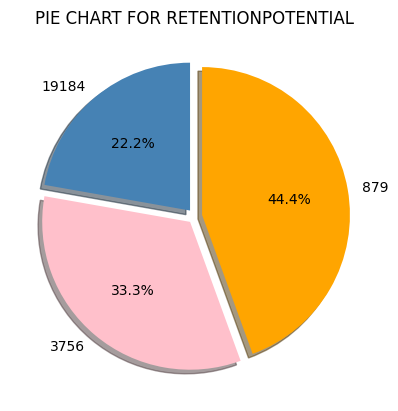

In [33]:

# Data for the pie chart
labels = merged_train["RetentionPotential"].value_counts()
colors = ['steelblue', 'pink', 'orange']
myexplode = (0.05,0.05,0.05)
sizes = [20,30,40]

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode = myexplode, shadow = True)

# Add a title
plt.title('PIE CHART FOR RETENTIONPOTENTIAL')

# Display the chart
plt.show()
# in this code some wrong labels as values

In [34]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [35]:
#RetentionPotential based on City in train data
sns.displot(data = merged_train, x = "RetentionPotential", col = "City", kind = "hist", height = 7, aspect = 1,multiple = "stack")

NameError: name 'sns' is not defined

In [36]:
sns.distplot(merged_train["OrderQuantity"])

NameError: name 'sns' is not defined

In [37]:
for i in merged_train.columns:
    print(i)
    print(merged_train[i].value_counts())
    print("Unique values of",i,"-------------->",len(merged_train[i].unique()))

CustomerID
CustomerID
C12116    1
C32156    1
C32168    1
C32167    1
C32166    1
         ..
C22204    1
C22202    1
C22201    1
C22200    1
C15837    0
Name: count, Length: 23820, dtype: int64
Unique values of CustomerID --------------> 23819
City
City
CITY4    9143
CITY2    6878
CITY3    6490
CITY1    1308
Name: count, dtype: int64
Unique values of City --------------> 4
DateOfRegistration
DateOfRegistration
2012-08-28    356
2013-09-17    185
2013-09-18    183
2011-05-13    176
2013-09-19    148
             ... 
2016-03-01      1
2016-02-05      1
2014-01-23      1
2017-01-02      1
2012-12-26      1
Name: count, Length: 2672, dtype: int64
Unique values of DateOfRegistration --------------> 2672
OnlineCommunication
OnlineCommunication
1    15731
0     8088
Name: count, dtype: int64
Unique values of OnlineCommunication --------------> 2
AutomaticRefill
AutomaticRefill
0    21563
1     2256
Name: count, dtype: int64
Unique values of AutomaticRefill --------------> 2
DoorstepDelivery

In [38]:
from scipy.stats import chi2_contingency

In [39]:
insignificant_columns = []
for column in merged_train.columns:
    contingency_table = pd.crosstab(merged_train[column], merged_train["RetentionPotential"])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    if p_value > 0.05: # Check if p-value is greater than 0.05
        insignificant_columns.append(column)

In [40]:
print(insignificant_columns)

['CustomerID', 'EmailType', 'MailOpened', 'timestamp_y']


In [41]:
merged_train.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'DateOfemail', 'EmailType', 'timestamp_x', 'MailOpened', 'MailClicked',
       'DateOfOrder', 'timestamp_y', 'OrderQuantity', 'RetentionPotential'],
      dtype='object')

## Dropping the columns based on uniqueness and Insignificance

In [42]:
merged_train.drop(["CustomerID","DateOfRegistration","DateOfemail","EmailType","timestamp_x","MailOpened","timestamp_y"],axis = 1, inplace = True)

In [43]:
merged_train

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,MailClicked,DateOfOrder,OrderQuantity,RetentionPotential
0,CITY2,0,0,0,Monday,yes,2013-08-11,15,High
1,CITY2,1,1,1,Friday,yes,2014-01-19,108,Low
2,CITY2,0,0,0,Wednesday,NotApplicable,2011-07-06,51,Medium
3,CITY4,0,0,0,Monday,yes,2013-01-28,117,Low
4,CITY2,1,1,0,Friday,yes,2014-01-16,83,Low
...,...,...,...,...,...,...,...,...,...
23815,CITY2,1,1,0,Friday,NotApplicable,2018-01-17,41,Low
23816,CITY3,1,0,1,Friday,NotApplicable,2018-01-17,56,Low
23817,CITY3,1,0,0,Saturday,NotApplicable,2018-01-17,35,Low
23818,CITY3,1,1,0,Saturday,yes,2018-01-21,53,Low


In [44]:
merged_train.drop(["DateOfOrder"],axis =1, inplace = True)

In [45]:
merged_train

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,MailClicked,OrderQuantity,RetentionPotential
0,CITY2,0,0,0,Monday,yes,15,High
1,CITY2,1,1,1,Friday,yes,108,Low
2,CITY2,0,0,0,Wednesday,NotApplicable,51,Medium
3,CITY4,0,0,0,Monday,yes,117,Low
4,CITY2,1,1,0,Friday,yes,83,Low
...,...,...,...,...,...,...,...,...
23815,CITY2,1,1,0,Friday,NotApplicable,41,Low
23816,CITY3,1,0,1,Friday,NotApplicable,56,Low
23817,CITY3,1,0,0,Saturday,NotApplicable,35,Low
23818,CITY3,1,1,0,Saturday,yes,53,Low


In [46]:
cat_cols = ["City","OnlineCommunication","AutomaticRefill","DoorstepDelivery","PreferredDeliveryDay","MailClicked"]
num_cols = ["OrderQuantity"]

In [47]:
X = merged_train.drop(["RetentionPotential"], axis =1)
y = merged_train["RetentionPotential"]

In [48]:
X

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,MailClicked,OrderQuantity
0,CITY2,0,0,0,Monday,yes,15
1,CITY2,1,1,1,Friday,yes,108
2,CITY2,0,0,0,Wednesday,NotApplicable,51
3,CITY4,0,0,0,Monday,yes,117
4,CITY2,1,1,0,Friday,yes,83
...,...,...,...,...,...,...,...
23815,CITY2,1,1,0,Friday,NotApplicable,41
23816,CITY3,1,0,1,Friday,NotApplicable,56
23817,CITY3,1,0,0,Saturday,NotApplicable,35
23818,CITY3,1,1,0,Saturday,yes,53


In [49]:
y

0          High
1           Low
2        Medium
3           Low
4           Low
          ...  
23815       Low
23816       Low
23817       Low
23818       Low
23819       Low
Name: RetentionPotential, Length: 23819, dtype: category
Categories (3, object): ['High', 'Low', 'Medium']

## labelling the target variables (low, high, medium as 0,1,2)

In [58]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 49.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 7.5 MB/s eta 0:00:0000:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [59]:
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
le = LabelEncoder()

# encode the target variable
y = pd.DataFrame(le.fit_transform(y))

In [60]:
y

,0
0,0
1,1
2,2
3,1
4,1
...,...
23814,1
23815,1
23816,1
23817,1


In [61]:
y = y.rename(columns={0:"RetentionPotential"})

In [62]:
y

,RetentionPotential
0,0
1,1
2,2
3,1
4,1
...,...
23814,1
23815,1
23816,1
23817,1


In [63]:
# detecting ouliers for all before removing 
Q1 = merged_train[num_cols].quantile(0.25)
Q3 = merged_train[num_cols].quantile(0.75)
IQR = Q3-Q1

before_rvm_outliers = ((merged_train[num_cols]<(Q1-1.5*IQR)) | (merged_train[num_cols]>(Q3+1.5*IQR))).sum()
before_rvm_outliers

OrderQuantity    1298
dtype: int64

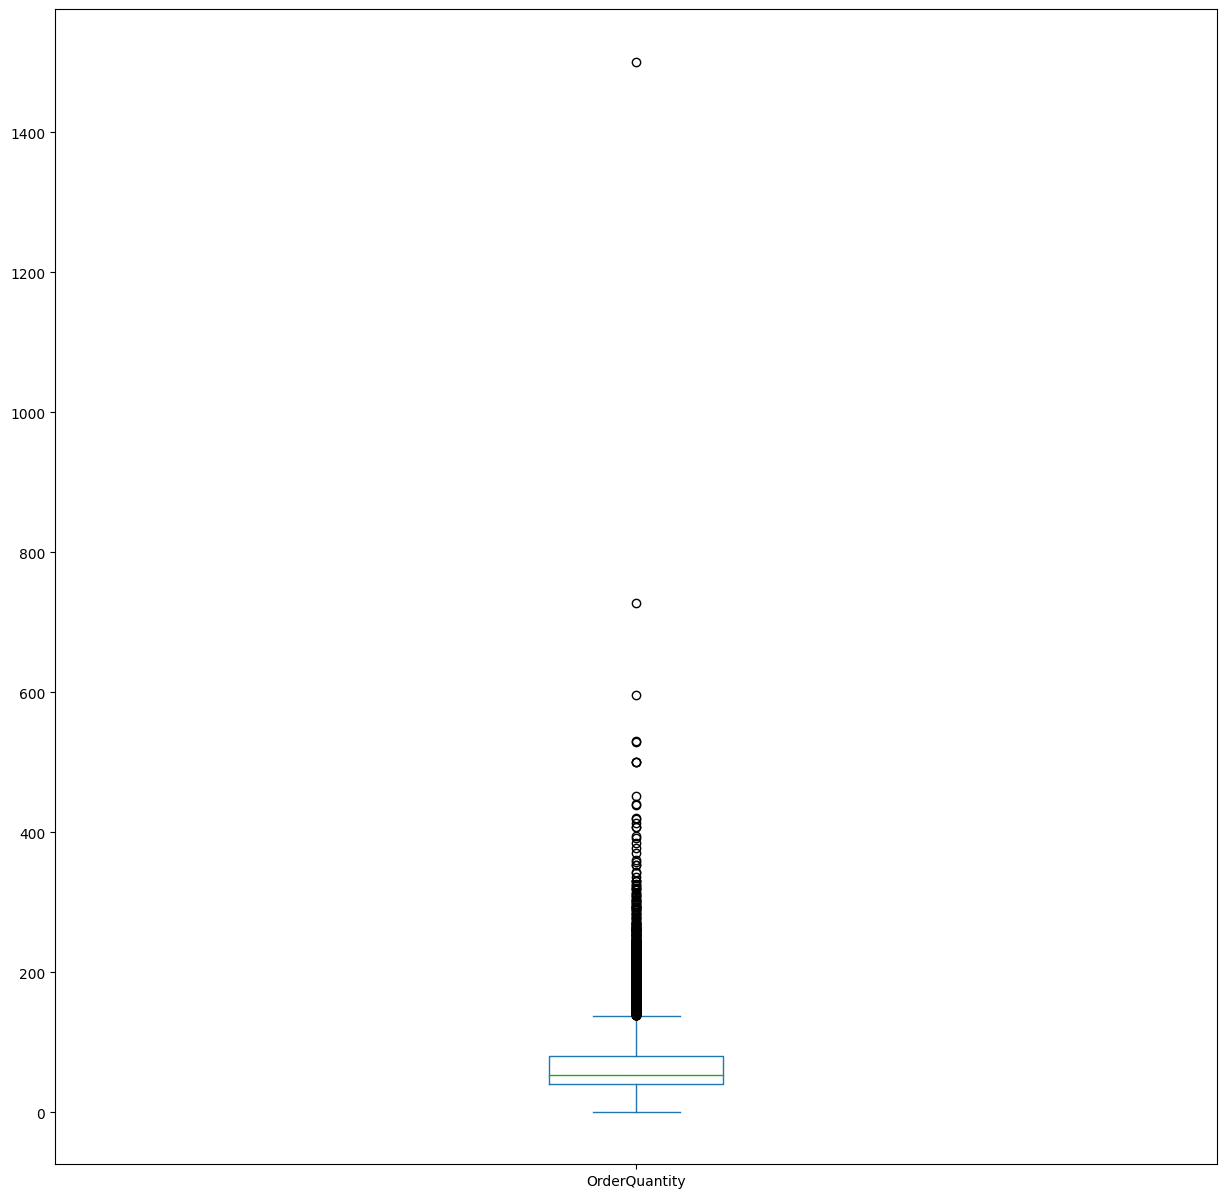

In [64]:
#boxplot for all the numerical attributes in dataframe
merged_train.plot(kind ='box',subplots = True,sharex= False,sharey=False,figsize=(15,15))
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, stratify = y,test_size=0.3,random_state=107)

In [66]:
print("X_train is:", X_train.shape)
print("X_val is:", X_val.shape)
print("X_train is:", y_train.shape)
print("X_val is:", y_val.shape)

X_train is: (16673, 7)
X_val is: (7146, 7)
X_train is: (16673, 1)
X_val is: (7146, 1)


In [67]:
X_train

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,MailClicked,OrderQuantity
17482,CITY2,1,0,0,Friday,NotApplicable,72
9865,CITY4,1,1,0,Wednesday,NotApplicable,54
21295,CITY3,1,0,0,Friday,yes,137
17486,CITY1,1,0,0,Tuesday,NotApplicable,35
16987,CITY2,1,0,0,Friday,yes,45
...,...,...,...,...,...,...,...
18942,CITY1,1,1,0,Saturday,NotApplicable,40
22446,CITY2,1,0,0,Thursday,yes,62
8069,CITY2,0,0,0,Wednesday,no,84
1298,CITY3,0,0,0,Wednesday,NotApplicable,127


In [68]:
y_train

,RetentionPotential
17481,1
9864,1
21294,1
17485,1
16986,1
...,...
18941,1
22445,1
8069,0
1298,2


In [69]:
X_val

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,MailClicked,OrderQuantity
282,CITY2,0,0,0,Thursday,NotApplicable,26
15180,CITY2,1,0,0,Tuesday,no,114
12189,CITY4,1,1,0,Monday,no,99
2992,CITY2,1,0,0,Monday,yes,65
11178,CITY4,1,0,0,Thursday,NotApplicable,41
...,...,...,...,...,...,...,...
10279,CITY4,1,0,0,Monday,yes,41
21348,CITY4,1,1,0,Thursday,no,57
17024,CITY2,1,1,0,Monday,yes,63
6736,CITY1,1,0,0,Tuesday,yes,90


In [70]:
y_val

,RetentionPotential
282,1
15179,1
12188,2
2992,1
11177,0
...,...
10278,1
21347,1
17023,1
6736,1


In [71]:
y_train.value_counts(normalize = True)*100

RetentionPotential
1                     80.543394
0                     15.768008
2                      3.688598
Name: proportion, dtype: float64

In [72]:
y_val.value_counts(normalize = True)*100

RetentionPotential
1                     80.534565
0                     15.771061
2                      3.694374
Name: proportion, dtype: float64

In [73]:
X_train.isnull().sum()

City                    0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
MailClicked             0
OrderQuantity           0
dtype: int64

In [74]:
X_val.isnull().sum()

City                    0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
MailClicked             0
OrderQuantity           0
dtype: int64

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
# fitting the X_train[num_cols] in standardization model
scaler = StandardScaler()
scaler = scaler.fit(X_train[num_cols])

In [77]:
# fitting the X_train[num_cols] and X_test[num_cols] in standardization model
X_train_std = pd.DataFrame(scaler.transform(X_train[num_cols]), columns = X_train[num_cols].columns)
X_val_std = pd.DataFrame(scaler.transform(X_val[num_cols]), columns = X_val[num_cols].columns)

In [78]:
X_train_std

,OrderQuantity
0,0.146977
1,-0.282374
2,1.697410
3,-0.735578
4,-0.497049
...,...
16668,-0.616314
16669,-0.091551
16670,0.433211
16671,1.458882


In [79]:
X_val_std

,OrderQuantity
0,-0.950253
1,1.148795
2,0.791003
3,-0.019993
4,-0.592461
...,...
7141,-0.592461
7142,-0.210816
7143,-0.067699
7144,0.576328


In [80]:
# creationg dummies for cat_cols from X_train
X_train_dummies = pd.get_dummies(X_train[cat_cols],drop_first = True)

In [81]:
X_train_dummies

,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,MailClicked_no,MailClicked_yes
17482,True,False,False,True,False,False,False,False,False,False,False,False,False,False
9865,False,False,True,True,True,False,False,False,False,False,False,True,False,False
21295,False,True,False,True,False,False,False,False,False,False,False,False,False,True
17486,False,False,False,True,False,False,False,False,False,False,True,False,False,False
16987,True,False,False,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18942,False,False,False,True,True,False,False,True,False,False,False,False,False,False
22446,True,False,False,True,False,False,False,False,False,True,False,False,False,True
8069,True,False,False,False,False,False,False,False,False,False,False,True,True,False
1298,False,True,False,False,False,False,False,False,False,False,False,True,False,False


In [82]:
# creationg dummies for cat_cols from X_test
X_val_dummies = pd.get_dummies(X_val[cat_cols],drop_first = True)

In [83]:
X_val_dummies

,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,MailClicked_no,MailClicked_yes
282,True,False,False,False,False,False,False,False,False,True,False,False,False,False
15180,True,False,False,True,False,False,False,False,False,False,True,False,True,False
12189,False,False,True,True,True,False,True,False,False,False,False,False,True,False
2992,True,False,False,True,False,False,True,False,False,False,False,False,False,True
11178,False,False,True,True,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10279,False,False,True,True,False,False,True,False,False,False,False,False,False,True
21348,False,False,True,True,True,False,False,False,False,True,False,False,True,False
17024,True,False,False,True,True,False,True,False,False,False,False,False,False,True
6736,False,False,False,True,False,False,False,False,False,False,True,False,False,True


In [84]:
# resetting the index to concat correctly
X_train_std = X_train_std.reset_index()
X_train_std

,index,OrderQuantity
0,0,0.146977
1,1,-0.282374
2,2,1.697410
3,3,-0.735578
4,4,-0.497049
...,...,...
16668,16668,-0.616314
16669,16669,-0.091551
16670,16670,0.433211
16671,16671,1.458882


In [85]:
# dropping the index column 
X_train_std = X_train_std.drop(["index"], axis = 1)
X_train_std

,OrderQuantity
0,0.146977
1,-0.282374
2,1.697410
3,-0.735578
4,-0.497049
...,...
16668,-0.616314
16669,-0.091551
16670,0.433211
16671,1.458882


In [86]:
# resetting the index to concat correctly
X_val_std = X_val_std.reset_index()
X_val_std

,index,OrderQuantity
0,0,-0.950253
1,1,1.148795
2,2,0.791003
3,3,-0.019993
4,4,-0.592461
...,...,...
7141,7141,-0.592461
7142,7142,-0.210816
7143,7143,-0.067699
7144,7144,0.576328


In [87]:
# dropping the index column 
X_val_std = X_val_std.drop(["index"], axis = 1)
X_val_std

,OrderQuantity
0,-0.950253
1,1.148795
2,0.791003
3,-0.019993
4,-0.592461
...,...
7141,-0.592461
7142,-0.210816
7143,-0.067699
7144,0.576328


In [88]:
# resetting the index to concat correctly
X_train_dummies = X_train_dummies.reset_index()
X_train_dummies

,index,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,MailClicked_no,MailClicked_yes
0,17482,True,False,False,True,False,False,False,False,False,False,False,False,False,False
1,9865,False,False,True,True,True,False,False,False,False,False,False,True,False,False
2,21295,False,True,False,True,False,False,False,False,False,False,False,False,False,True
3,17486,False,False,False,True,False,False,False,False,False,False,True,False,False,False
4,16987,True,False,False,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16668,18942,False,False,False,True,True,False,False,True,False,False,False,False,False,False
16669,22446,True,False,False,True,False,False,False,False,False,True,False,False,False,True
16670,8069,True,False,False,False,False,False,False,False,False,False,False,True,True,False
16671,1298,False,True,False,False,False,False,False,False,False,False,False,True,False,False


In [89]:
# dropping the index column 
X_train_dummies = X_train_dummies.drop(["index"], axis = 1)
X_train_dummies

,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,MailClicked_no,MailClicked_yes
0,True,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,True,False,False,False,False,False,False,True,False,False
2,False,True,False,True,False,False,False,False,False,False,False,False,False,True
3,False,False,False,True,False,False,False,False,False,False,True,False,False,False
4,True,False,False,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16668,False,False,False,True,True,False,False,True,False,False,False,False,False,False
16669,True,False,False,True,False,False,False,False,False,True,False,False,False,True
16670,True,False,False,False,False,False,False,False,False,False,False,True,True,False
16671,False,True,False,False,False,False,False,False,False,False,False,True,False,False


In [90]:
# resetting the index to concat correctly
X_val_dummies = X_val_dummies.reset_index()
X_val_dummies

,index,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,MailClicked_no,MailClicked_yes
0,282,True,False,False,False,False,False,False,False,False,True,False,False,False,False
1,15180,True,False,False,True,False,False,False,False,False,False,True,False,True,False
2,12189,False,False,True,True,True,False,True,False,False,False,False,False,True,False
3,2992,True,False,False,True,False,False,True,False,False,False,False,False,False,True
4,11178,False,False,True,True,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,10279,False,False,True,True,False,False,True,False,False,False,False,False,False,True
7142,21348,False,False,True,True,True,False,False,False,False,True,False,False,True,False
7143,17024,True,False,False,True,True,False,True,False,False,False,False,False,False,True
7144,6736,False,False,False,True,False,False,False,False,False,False,True,False,False,True


In [91]:
# dropping the index column 
X_val_dummies = X_val_dummies.drop(["index"], axis = 1)
X_val_dummies

,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,MailClicked_no,MailClicked_yes
0,True,False,False,False,False,False,False,False,False,True,False,False,False,False
1,True,False,False,True,False,False,False,False,False,False,True,False,True,False
2,False,False,True,True,True,False,True,False,False,False,False,False,True,False
3,True,False,False,True,False,False,True,False,False,False,False,False,False,True
4,False,False,True,True,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,False,False,True,True,False,False,True,False,False,False,False,False,False,True
7142,False,False,True,True,True,False,False,False,False,True,False,False,True,False
7143,True,False,False,True,True,False,True,False,False,False,False,False,False,True
7144,False,False,False,True,False,False,False,False,False,False,True,False,False,True


In [92]:
# Concating the X_train_std, X_train_dummies as final_X_train_data
final_X_train = pd.concat([X_train_std,X_train_dummies], axis = 1)

In [93]:
final_X_train

,OrderQuantity,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,MailClicked_no,MailClicked_yes
0,0.146977,True,False,False,True,False,False,False,False,False,False,False,False,False,False
1,-0.282374,False,False,True,True,True,False,False,False,False,False,False,True,False,False
2,1.697410,False,True,False,True,False,False,False,False,False,False,False,False,False,True
3,-0.735578,False,False,False,True,False,False,False,False,False,False,True,False,False,False
4,-0.497049,True,False,False,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16668,-0.616314,False,False,False,True,True,False,False,True,False,False,False,False,False,False
16669,-0.091551,True,False,False,True,False,False,False,False,False,True,False,False,False,True
16670,0.433211,True,False,False,False,False,False,False,False,False,False,False,True,True,False
16671,1.458882,False,True,False,False,False,False,False,False,False,False,False,True,False,False


In [94]:
# Concating the X_test_std, X_test_dummies as final_X_test_data
final_X_val = pd.concat([X_val_std,X_val_dummies], axis = 1)

In [95]:
final_X_val

,OrderQuantity,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,MailClicked_no,MailClicked_yes
0,-0.950253,True,False,False,False,False,False,False,False,False,True,False,False,False,False
1,1.148795,True,False,False,True,False,False,False,False,False,False,True,False,True,False
2,0.791003,False,False,True,True,True,False,True,False,False,False,False,False,True,False
3,-0.019993,True,False,False,True,False,False,True,False,False,False,False,False,False,True
4,-0.592461,False,False,True,True,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,-0.592461,False,False,True,True,False,False,True,False,False,False,False,False,False,True
7142,-0.210816,False,False,True,True,True,False,False,False,False,True,False,False,True,False
7143,-0.067699,True,False,False,True,True,False,True,False,False,False,False,False,False,True
7144,0.576328,False,False,False,True,False,False,False,False,False,False,True,False,False,True


# Model Building

## SVM

In [97]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [98]:
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [0.1, 1, 10, 100], 
              'kernel': ['linear', 'rbf']}

In [ ]:
# Create the SVM model
svm_model = SVC(random_state = 10)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=2)

# Fit the GridSearchCV object to the data
grid_search.fit(final_X_train, y_train)

In [ ]:
print("Best hyperparameters: ", grid_search.best_params_)

In [ ]:
# model building by SVM algorithm
svm_model = SVC(kernel="rbf", C = 1, gamma = 0.1)
svm_model = svm_model.fit(final_X_train,y_train)

In [ ]:
# predicting the y value for the train data
svm_model_y_train_preds = svm_model.predict(final_X_train)
svm_model_y_train_preds[0:30]

In [ ]:
# predicting the y value for the test data
svm_model_y_val_preds = svm_model.predict(final_X_val)
svm_model_y_val_preds[0:30]

In [ ]:
# import libraries of confusion_matrix and accuracy and recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score, f1_score

In [ ]:
# finding the confusion_matrix for y_train actuals and y_train_predicts
confusionmatrix = confusion_matrix(y_train,svm_model_y_train_preds)
confusionmatrix

In [ ]:
# finding the confusion_matrix for y_test actuals and y_test_predicts
confusionmatrix = confusion_matrix(y_val,svm_model_y_val_preds)
confusionmatrix

In [ ]:
# finding the accuracy for y_train_actuals and y_train_predicts
svm_accuracy_train = accuracy_score(y_train,svm_model_y_train_preds)
svm_accuracy_train

In [ ]:
# finding the accuracy for y_test_actuals and y_test_predicts
svm_accuracy_test = accuracy_score(y_val,svm_model_y_val_preds)
svm_accuracy_test

In [ ]:
svm_f1_score_train = f1_score(y_train,svm_model_y_train_preds,average='micro')
svm_f1_score_train

In [ ]:
svm_f1_score_test = f1_score(y_val,svm_model_y_val_preds,average='micro')
svm_f1_score_test

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# create logistic regression model and fit it to the training data
logreg = LogisticRegression(random_state=42)
logreg.fit(final_X_train, y_train)

In [ ]:
# predicting the y value for the train data
logreg_model_y_train_preds = logreg.predict(final_X_train)
logreg_model_y_train_preds[0:30]

In [ ]:
# predicting the y value for the test data
logreg_model_y_val_preds = logreg.predict(final_X_val)
logreg_model_y_val_preds[0:30]

In [ ]:
# finding the confusion_matrix for y_train actuals and y_train_predicts
confusionmatrix = confusion_matrix(y_train,logreg_model_y_train_preds)
confusionmatrix

In [ ]:
# finding the confusion_matrix for y_test actuals and y_test_predicts
confusionmatrix = confusion_matrix(y_val,logreg_model_y_val_preds)
confusionmatrix

In [ ]:
# finding the accuracy for y_train_actuals and y_train_predicts
logreg_accuracy_train = accuracy_score(y_train,logreg_model_y_train_preds)
logreg_accuracy_train

In [ ]:
# finding the accuracy for y_test_actuals and y_test_predicts
logreg_accuracy_test = accuracy_score(y_val,logreg_model_y_val_preds)
logreg_accuracy_test

In [ ]:
logreg_f1_score_train = f1_score(y_train,logreg_model_y_train_preds,average="micro")
logreg_f1_score_train

In [ ]:
logreg_f1_score_test = f1_score(y_val,logreg_model_y_val_preds,average='micro')
logreg_f1_score_test

## XGBoost

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xg_boost = xgb.XGBClassifier(max_depth = 3, eta = 0.1,)
xg_boost = xg_boost.fit(final_X_train,y_train)

In [ ]:
# predicting the y value for the train data
xg_boost_model_y_train_preds = xg_boost.predict(final_X_train)
xg_boost_model_y_train_preds[0:30]

In [ ]:
# predicting the y value for the test data
xg_boost_model_y_val_preds = xg_boost.predict(final_X_val)
xg_boost_model_y_val_preds[0:30]

In [ ]:
# finding the confusion_matrix for y_train actuals and y_train_predicts
confusionmatrix = confusion_matrix(y_train,xg_boost_model_y_train_preds)
confusionmatrix

In [ ]:
# finding the confusion_matrix for y_test actuals and y_test_predicts
confusionmatrix = confusion_matrix(y_val,xg_boost_model_y_val_preds)
confusionmatrix

In [ ]:
# finding the accuracy for y_train_actuals and y_train_predicts
xg_accuracy_train = accuracy_score(y_train,xg_boost_model_y_train_preds)
xg_accuracy_train

In [ ]:
xg_accuracy_test = accuracy_score(y_val,xg_boost_model_y_val_preds)
xg_accuracy_test

In [ ]:
xg_f1_score_train = f1_score(y_train,xg_boost_model_y_train_preds,average="micro")
xg_f1_score_train

In [ ]:
xg_f1_score_test = f1_score(y_val,xg_boost_model_y_val_preds,average="micro")
xg_f1_score_test

In [ ]:
print("\n")
print("     **********  SVM MODEL  **********\n\n","svm_accuracy_train   ----->   ",svm_accuracy_train,"\n","svm_accuracy_test    ----->   ",svm_accuracy_test,"\n","svm_f1_score_train   ----->   ",svm_f1_score_train,"\n","svm_f1_score_test    ----->   ",svm_f1_score_test,"\n")
print("     **********  LOGISTIC MODEL  **********\n\n","logreg_accuracy_train   ----->   ", logreg_accuracy_train,"\n","dt_accuracy_test    ----->   ",logreg_accuracy_test,"\n","dt_f1_score_train   ----->   ",logreg_f1_score_train,"\n","dt_f1_score_test    ----->   ",logreg_f1_score_test,"\n")
print("     **********  XG BOOST MODEL  **********\n\n","xgboost_accuracy_train   ----->   ", xg_accuracy_train,"\n","xgboost_accuracy_test    ----->   ",xg_accuracy_test,"\n","xgboost_f1_score_train   ----->   ",xg_f1_score_train,"\n","xgboost_f1_score_test    ----->   ",xg_f1_score_test)